In [1]:
#investigation goal
#I want to look at the sum of probabilities that schmidt states are in an energy eigenstates. 
#I expect that it is conserved, but my gifs seems to be showing something different.

#correct that, we obviously dont have that the sum of weights is summed on a energie eigenstate, but maybe that the sum of weights, weighted by the schmidt value is.

#find a way to check that.





In [4]:
import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt
from q_solve import test
from q_solve import generate_result
from Schmidt_solve import compute_schmidt_states


In [5]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.03
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
#using all above to obtain QM qtts
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,1)
time_indices = [0, 10, 20, 30, 49]  # Specify the time indices of interest

Text(0, 0.5, 'Eigenvalue Magnitude')

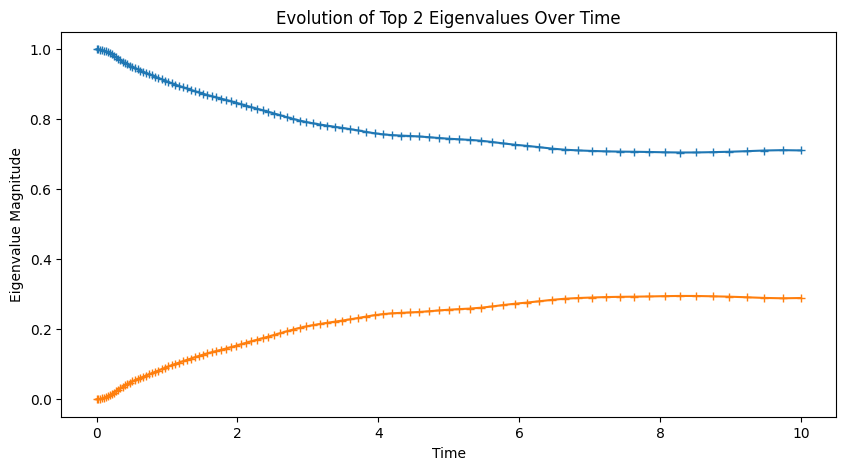

In [4]:
#need a plpot of schmidt value over time

s_val_0=[]
s_val_1=[]
t_ind = range(len(tlist))
for idx in t_ind:
    s_val_0.append(compute_schmidt_states(result, idx, 0, 1)[0])
for idx in t_ind:
#the 2 states are orthogonal
    s_val_1.append(compute_schmidt_states(result, idx, 0, 1)[1])

plt.figure(figsize=(10, 5))
plt.plot(tlist,s_val_0, marker='+')
plt.plot(tlist,s_val_1, marker='+')
plt.title('Evolution of Top 2 Eigenvalues Over Time')
plt.xlabel('Time')
plt.ylabel('Eigenvalue Magnitude')




Text(0, 0.5, 'Eigenvalue Magnitude')

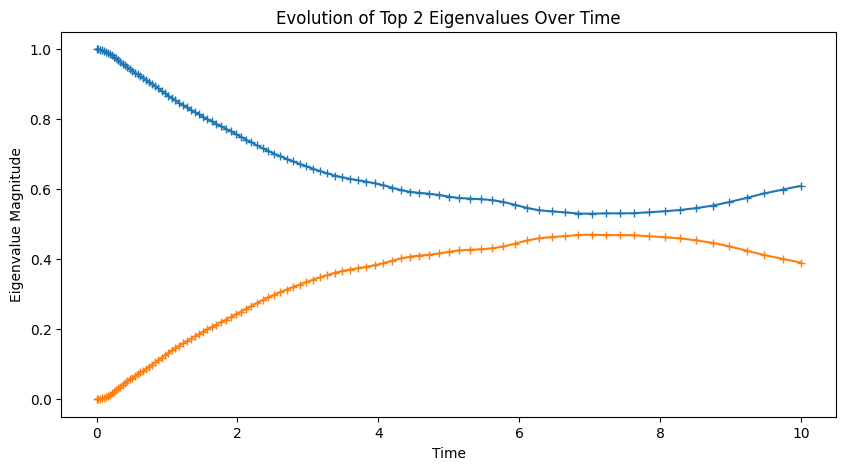

In [5]:
#looking at what happens when the schmidt werights converge to the same value:

result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,0.5, E_spacing, Int_strength, 10, 100,1)

s_0=[]
s_1=[]
t_ind = range(len(tlist))
for idx in t_ind:
    s_0.append(compute_schmidt_states(result, idx, 0, 1)[0])
for idx in t_ind:
#the 2 states are orthogonal
    s_1.append(compute_schmidt_states(result, idx, 0, 1)[1])

plt.figure(figsize=(10, 5))
plt.plot(tlist,s_0, marker='+')
plt.plot(tlist,s_1, marker='+')
plt.title('Evolution of Top 2 Eigenvalues Over Time')
plt.xlabel('Time')
plt.ylabel('Eigenvalue Magnitude')




In [85]:
# have a look at the weight on the 0?
#or on the main one?
def compute_schmidt_states(result, time_index, subsystem_index=0, trigger=0):
    density_matrix = qt.ptrace(result.states[time_index], [subsystem_index]) # Calculate the density matrix at the specified time
    eigenvalues, eigenstates = density_matrix.eigenstates() # Compute the eigenstates and eigenvalues of the density matrix
    eigenstates = [np.array(state) for state in eigenstates]
    schmidt_states = []
    schmidt_values = []
    for state, eigenvalue in zip(eigenstates, eigenvalues):
        schmidt_values.append(eigenvalue)
        if eigenvalue < 10e-14:
            # If the eigenvalue is zero, set the Schmidt state to a zero vector
            schmidt_states.append(np.zeros_like(state))
        else:
            #print(f"state {state}")
            N=abs(np.vdot(state.conjugate(),state))
            schmidt_states.append(state/np.sqrt(N)) # Normalize
        
    # Sort the Schmidt states by eigenvalue in descending order
    schmidt_states, schmidt_values = zip(*sorted(zip(schmidt_states, schmidt_values), key=lambda x: -x[1]))
    #print(schmidt_values)
    if trigger == 0:
        return schmidt_states
    else:
        return schmidt_values

def compute_schmidt_2(result,idx,s=1):
    if s==1:
        a = compute_schmidt_states(result, idx, 0, 0)[0] #schmidt 1 on system 1
        a = np.squeeze(a)
        b = compute_schmidt_states(result, idx, 1, 0)[0] #schmidt 1 on system 2
        b=np.squeeze(b)
        g = np.outer(a, b).flatten()
        g=np.squeeze(g)
    elif s==2:
        a = compute_schmidt_states(result, idx, 0, 0)[1] #schmidt 2 on system 1
        a = np.squeeze(a)
        b = compute_schmidt_states(result, idx, 1, 0)[1] #schmidt 2 on system 2
        b=np.squeeze(b)
        g = np.outer(a, b).flatten()
        g=np.squeeze(g)
    return g


In [86]:

#make a function to find an eingenstate over which both schmidt are nonzero? 


In [87]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.03
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
#using all above to obtain QM qtts
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,1)

s_val_0=[]
s_val_1=[]
t_ind = range(len(tlist))
for idx in t_ind:
    s_val_0.append(compute_schmidt_states(result, idx, 0, 1)[0])
for idx in t_ind:
#the 2 states are orthogonal
    s_val_1.append(compute_schmidt_states(result, idx, 0, 1)[1])

eigenenergies_total, eigenstates_total = H_total.eigenstates() 

1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010


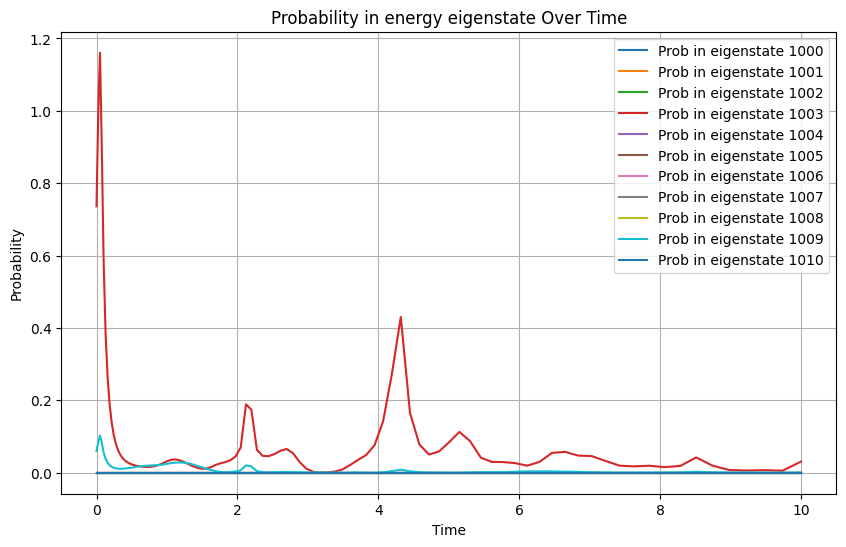

In [88]:
prob_list=[]
start_num = 1000
end_num = 1010


# Create an array of integers between start_num and end_num
arr = np.arange(start_num, end_num + 1)

for i in arr:
    eig = eigenstates_total[i]
    prob=[]
    _=[prob.append(abs(np.vdot(compute_schmidt_2(result,idx,1).conjugate(), eig)) ** 2) for idx in range(len(tlist))]
    prob_list.append(prob)
    print(i)
#    for idx in range(len(tlist)):
#        state = compute_schmidt_2(result,idx,2)
#        energy_coeff.append(abs(np.vdot(state.conjugate(), eig)) ** 2)


plt.figure(figsize=(10, 6))
for prob in prob_list:
    #result = np.multiply(energy_coeff, s_val_1)
    plt.plot(tlist, prob)#result

plt.title('Probability in energy eigenstate Over Time')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.grid(True)
plt.legend([f'Prob in eigenstate {i}' for i in arr])
plt.show()

1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010


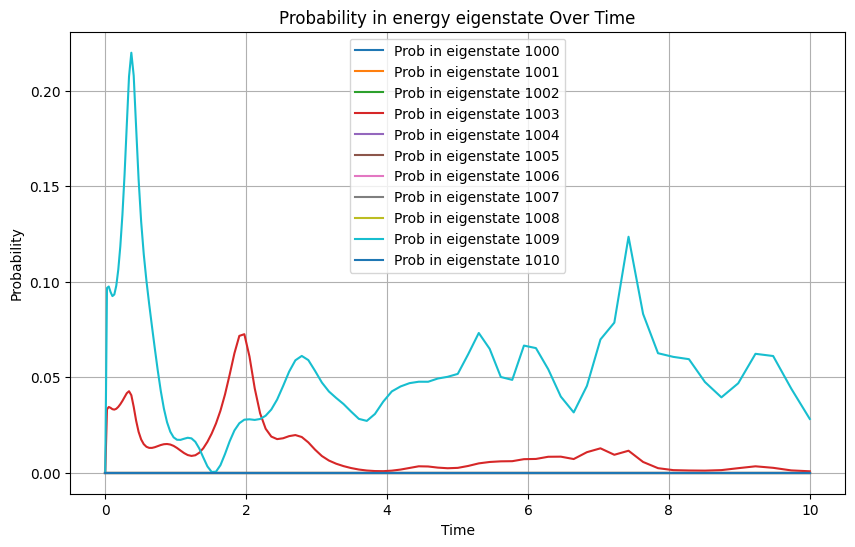

In [89]:
prob_list2=[]
start_num = 1000
end_num = 1010

# Create an array of integers between start_num and end_num
arr = np.arange(start_num, end_num + 1)

for i in arr:
    eig = eigenstates_total[i]
    prob=[]
    _=[prob.append(abs(np.vdot(compute_schmidt_2(result,idx,2).conjugate(), eig)) ** 2) for idx in range(len(tlist))]
    prob_list2.append(prob)
    print(i)

plt.figure(figsize=(10, 6))
for prob in prob_list2:
    plt.plot(tlist, prob)

plt.title('Probability in energy eigenstate Over Time')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.grid(True)
plt.legend([f'Prob in eigenstate {i}' for i in arr])
plt.show()

In [10]:
print(result.states[1].full())

[[0.+0.j]
 [0.+0.j]
 [0.+0.j]
 ...
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]]


1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010


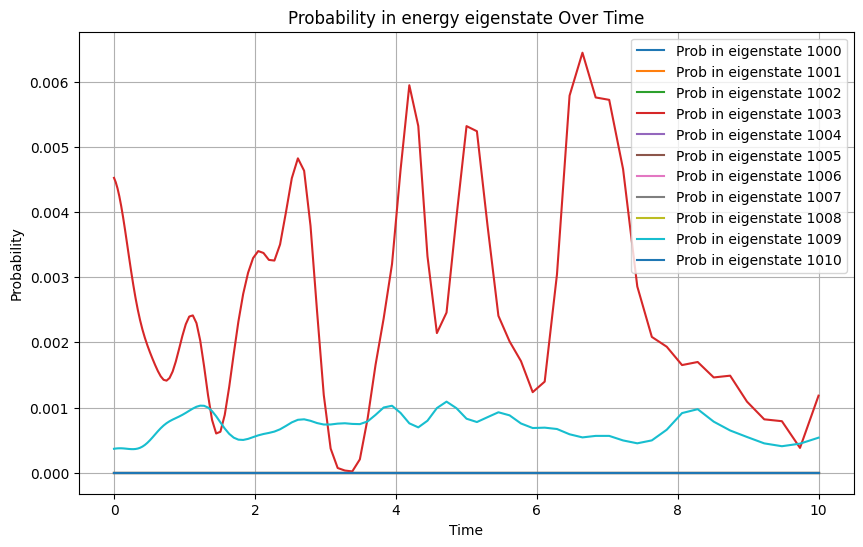

In [90]:
prob_list3=[]
start_num = 1000
end_num = 1010

# Create an array of integers between start_num and end_num
arr = np.arange(start_num, end_num + 1)

for i in arr:
    eig = eigenstates_total[i]
    prob=[]
    _=[prob.append(abs(np.vdot(result.states[idx].full().conjugate(), eig)) ** 2) for idx in range(len(tlist))]
    prob_list3.append(prob)
    print(i)

#Could it be that the basis in which states and eigenstates_total are defined is not the same??????????????

plt.figure(figsize=(10, 6))
for prob in prob_list3:
    plt.plot(tlist, prob)

plt.title('Probability in energy eigenstate Over Time')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.grid(True)
plt.legend([f'Prob in eigenstate {i}' for i in arr])
plt.show()

In [123]:
#From what I see, I get a bunch of zero vectors that stay 0 over time.
#Thuis bods well for my theory of conservastion

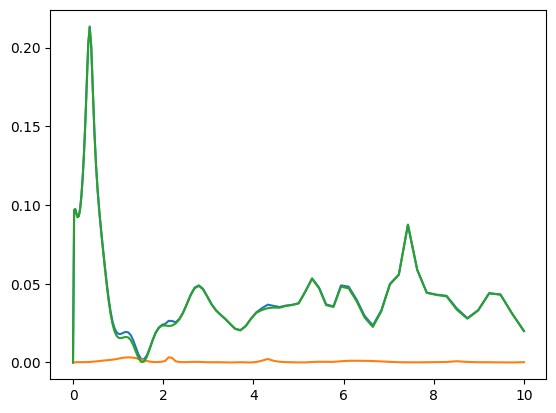

In [92]:
i=9

result = np.multiply(prob_list[i], s_val_1)+np.multiply(prob_list2[i], s_val_0)

plt.plot(tlist, result)
plt.plot(tlist,np.multiply(prob_list[i], s_val_1))
plt.plot(tlist,np.multiply(prob_list2[i], s_val_0))

#What this graph tells me is that somehow the sum of the probabilities of the 2 worlds being in  
#an energy eigenstate is not conserved over time.

# I need to do a more through examination of this for more states
#I need to verify theoretically that this is what we expect.
#I need to make sure thjat the multiplication by schmidt weight makes sense.



In [163]:
#This shows an obvious problem with my simulation, what i took to be probabilities sum to more than 1. 
#this was kind of obvious, looking at the values reached by unique energy coefficients (0.2 in the above graphs) 
idx=50
print(s_val_0[idx])
print(s_val_1[idx])

0.7934659936667603
0.2065340063332397


In [93]:
#np.set_printoptions(threshold=np.inf)
#np.set_printoptions()
#print(state)
#print(state.conjugate())

In [22]:
#This shows me that the propbability of being in an energy eigenstate is well defined. we test for s2, s2 and the global state
#What I dont get is how it is possible taht the probability taht the global state be in an energy eigenstate changes over time. 

eigenenergies_total, eigenstates_total = H_total.eigenstates() 
p_list=[]
for idx in range(len(tlist)):
    prob=[]
    state = result.states[idx].full()#compute_schmidt_2(result,idx,2)#compute_schmidt_2(result,idx,1)
    _=[prob.append(abs(np.vdot(state.conjugate(), eigenstate)) ** 2) for eigenstate in eigenstates_total]
    a = np.sum(prob)
    p_list.append(a)


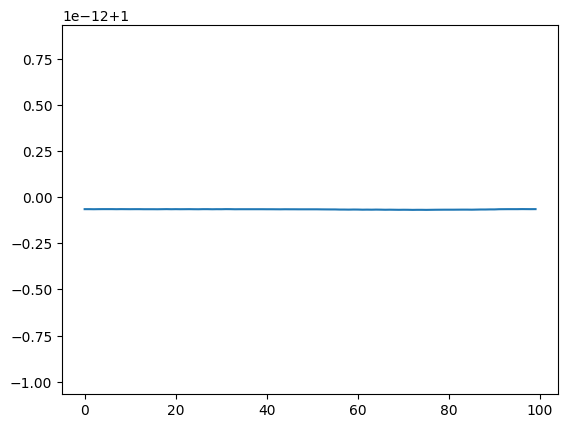

In [23]:
plt.plot(p_list)

In [ ]:
#I could also just check that the schmidt states sum up to the global state.


In [ ]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.03
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
#using all above to obtain QM qtts
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,1)
time_indices = [0, 10, 20, 30, 49]  # Specify the time indices of interest

In [ ]:
#redef schmidt state functions



In [82]:
def compute_schmidt_states(result, time_index, subsystem_index=0, trigger=0):
    density_matrix = qt.ptrace(result.states[time_index], [subsystem_index]) # Calculate the density matrix at the specified time
    eigenvalues, eigenstates = density_matrix.eigenstates() # Compute the eigenstates and eigenvalues of the density matrix
    eigenstates = [np.array(state) for state in eigenstates]
    schmidt_states = []
    schmidt_values = []
    for state, eigenvalue in zip(eigenstates, eigenvalues):
        schmidt_values.append(eigenvalue)
        if eigenvalue < 10e-14:
            # If the eigenvalue is zero, set the Schmidt state to a zero vector
            schmidt_states.append(np.zeros_like(state))
        else:
            #print(f"state {state}")
            N=abs(np.vdot(state.conjugate(),state))
            schmidt_states.append(state/np.sqrt(N)) # Normalize
        
    # Sort the Schmidt states by eigenvalue in descending order
    schmidt_states, schmidt_values = zip(*sorted(zip(schmidt_states, schmidt_values), key=lambda x: -x[1]))
    #print(schmidt_values)
    if trigger == 0:
        return schmidt_states
    else:
        return schmidt_values

In [83]:
idx=1


In [ ]:
#shows that i am not computing the schmidt states right.
#Note, are schmidt states equivalent to the eigenstates of the density matrix? Do i have the equivalence between the eigenstates of the density matrix and the
# schmidt states that appear in the schmidt decomposition?


s0=compute_schmidt_2(result,idx,1)
s0_val=compute_schmidt_states(result, idx, 0, 1)[0]
s1=compute_schmidt_2(result,idx,2)
s1_val=compute_schmidt_states(result, idx, 0, 1)[1]
print(s0)
print(s0_val)
print(s1)
print(s1_val)

#cehck the norm of the schmidt states without coefficient.
print(s0_val*abs(np.vdot(s0.conjugate(),s0))**2)
print(s1_val*abs(np.vdot(s1.conjugate(),s1))**2)



In [84]:
a0 = compute_schmidt_states(result, 50, 0, 0)[0]
a0_ = compute_schmidt_states(result, 50, 1, 0)[0]
a0_val=compute_schmidt_states(result, 50, 0, 1)[0]

a1 = compute_schmidt_states(result, 50, 0, 0)[1]
a1_ = compute_schmidt_states(result, 50, 1, 0)[1]
a1_val=compute_schmidt_states(result, 50, 0, 1)[1]

print("stop")

print(a0)
print(a0_val)
print(abs(np.vdot(a0.conjugate(),a0)))
print(abs(np.vdot(a1.conjugate(),a1)))
print(abs(np.vdot(a0_.conjugate(),a0_)))
print(abs(np.vdot(a1_.conjugate(),a1_)))

#very interesting note, it seems that the normalization does not work for getting the schmidt of teh system.

#things i see. it uses .norm() to normalize the state. how does it know which norm to use? it seems to be fine for the s_syst, but not s_env.... is it a size thing?

#there seems to be a huge amount of nonzero schmidt values for the environemnt. i thought there only should be one. why did you thin taht? because you equated
#eigenstate of density matrix to writting the state as a decomposition of 2 schmidt pure states. 
#I guess this image must be wrong.???? still cant reconcile the fact that the normalisation doesn't seem to work...

#Ok, so i changed the condition for the schmidt vector being 0s, its having a schmidt value under 10e-14

#I changed the normalization to be sqrt of the normalizing factor.

#I changed the fact that I am looking at the abs of projection of one onto otyher, not squared.

#need to go learn about normalization. is it squared or not?

#It fucking works when i stop squaring everything!!!!

# think in the end i will need to define the normalization with squaring and just square back afterwards.





stop
[[ 0.        +0.j       ]
 [ 0.        +0.j       ]
 [-0.46998329+0.j       ]
 [ 0.        +0.j       ]
 [ 0.        +0.j       ]
 [ 0.        +0.j       ]
 [ 0.        +0.j       ]
 [ 0.        +0.j       ]
 [-0.88252266+0.0219695j]
 [ 0.        +0.j       ]]
0.8582066552477274
1.0000000000000002
1.0000000000000002
0.9999999999999987
0.9999999999999994


In [91]:
#Check that they sum to the global state
idx=50
state = result.states[idx]

s0=compute_schmidt_2(result,idx,1)
s1=compute_schmidt_2(result,idx,2)

print(np.sum(a0_val*s0+a1_val*s1-state.full()))

#still doesn't seem to work



(1098.1775077624866+9042.914130032283j)


In [15]:


print(compute_schmidt_states(result, idx, 0, 1)[2])

AttributeError: 'numpy.ndarray' object has no attribute 'states'

In [100]:
#redefining the compute_schmidt better. 
#I was diagonalizing both rhosystem and rhoenv
#I need to diagonalize syst and find the schmidt stsates of the env by projection.

def compute_schmidt_states_new(result, time_index):
    global_state = result.states[time_index]
    density_matrix = qt.ptrace(global_state, [0]) # Calculate the density matrix at the specified time
    eigenvalues, eigenstates = density_matrix.eigenstates() # Compute the eigenstates and eigenvalues of the density matrix
    eigenstates = [np.array(state) for state in eigenstates]
    schmidt_states_s = []
    schmidt_states_e = []
    schmidt_values = []
    i=0
    for state, eigenvalue in zip(eigenstates, eigenvalues):
        schmidt_values.append(eigenvalue)
        if eigenvalue < 10e-14:
            # If the eigenvalue is zero, set the Schmidt state to a zero vector
            schmidt_states_s.append(np.zeros_like(state))
        else:
            #print(f"state {state}")
            i=i+1
            N=abs(np.vdot(state,state))
            schmidt_states_s.append(state/np.sqrt(N)) # Normalize

    # Sort the Schmidt states by eigenvalue in descending order
    schmidt_states_s, schmidt_values = zip(*sorted(zip(schmidt_states_s, schmidt_values), key=lambda x: -x[1]))
    d=np.size(global_state)
    d1 = np.size(schmidt_states_s[0])
    d2=d//d1
    #compute the schmidt states of the environement.
    schmidt_states_e = []
    I = np.eye(d2)
    #to get schmidt_env, we use that schmidt 1 and 2 of the system are |phi1> and |phi2>. 
    #Then we have that the global state can always be written as |psi>=s1|phi1>|a1>+s2|phi2>|a2>  
    for j in range(i):
        #step 1: get |phi_i>|ai>
        state = schmidt_states_s[j] #getting |phi_i>, is normalized
        P_a_state = np.kron(np.outer(state,state.conjugate().T),I) #def projector |phi_i><phi_i|xId, np.outer transposes the second one
        temp = np.dot(P_a_state,global_state) #We apply the projector on the global state: P|psi>=s1|phi_i>|a_i> and normalize. vdot is conjugate on first one. To normalize /schmidt_values[j] potentially
        temp = temp.flatten()
        #step 2:We have |phi_i>|a_i>. We know |phi_i> and want |a_i>. |phi_i>|a_i> = (phi^1_i|a_i>,phi^2_i|a_i>, ...)
        #find the first nonzero coeff of |phi_i> and use it to extract |a_i>
        nonzero_index = np.nonzero(state)[0][0] #will need to know the index of a nonzero value in |phi_i>
        #now extract a d2 sized vector from thatd2*d1 sized vector
        temp2 = temp[nonzero_index*d2:(nonzero_index+1)*d2] #for k the nnzero index, this is phi^k_i|a_i>
        temp3=temp2/state[nonzero_index]
        N = abs(np.vdot(temp3,temp3))
        
        schmidt_states_e.append(temp3/np.sqrt(N))

    return schmidt_states_s,schmidt_states_e,schmidt_values


'''
        for k in range(d2): #need to loop over dim of env to get all a^k_i
            temp2 = temp[k*d1:(k+1)*d1-1] # this is a^k_i|phi_i>
            ak_i = temp2[nonzero_index]/state[nonzero_index] #now we use our knowledge of |phi_i> to extract a^k_i
            a.append(ak_i)
        N = abs(np.vdot(a,a))
        schmidt_states_e.append(a/np.sqrt(N)) 
        ''' # i seem to have done it the wrong way
'''
    for j in range(i):
        state = schmidt_states_s[j]
        nonzero_indices = np.nonzero(state)[0][0]
        print(nonzero_indices)
        P_a_state = np.kron(np.outer(state,state.conjugate().T),I)     #def projector |><|xId, outer transposes teh second one
        temp = np.dot(P_a_state,global_state) #vdot is conjugate on first one.
        #this results in |phi>|ai>,
        temp2 = temp[(d1-1)*nonzero_indices,nonzero_indices*(d1)]/state[0][0]
        N = abs(np.vdot(global_state,temp))
        schmidt_states_e.append(temp2/np.sqrt(N))
    
        #I actually need to do the inverse of the tensor product. I have |phi>|a>=(a_1|phi>,a_2|phi>, ...), and I want |a>. SO I need to find a way to do |phi>|a>/|phi>
        #see https://quantumcomputing.stackexchange.com/questions/8832/how-to-efficiently-calculate-the-inverse-of-a-kronecker-product
'''    

#Note, outer(a,b) is (a1.b, a2.b,...) and |a>|b>=(a1|b>,a2|b>,...)
def compute_schmidt_full(result,idx,s=1):
    ss, se, sv = compute_schmidt_states_new(result, idx)
    if s==1:
        a = ss[0] #schmidt 1 on system 1
        a = np.squeeze(a)
        b = se[0] #schmidt 1 on system 2
        b=np.squeeze(b)
        g = np.outer(a,b).flatten()
        g=np.squeeze(g)
    elif s==2:
        a = ss[1] #schmidt 2 on system 1
        a = np.squeeze(a)
        b = se[1] #schmidt 2 on system 2
        b=np.squeeze(b)
        g = np.outer(a,b).flatten()
        g=np.squeeze(g)
    return g


In [20]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.09
# Define the time settings for the simulation
tmax= 100
ind_nb = 100
#using all above to obtain QM qtts
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
time_indices = [0, 10, 20, 30, 49]  # Specify the time indices of interest

In [46]:
a=[1,2]
b=[5,10]
print(np.outer(a,b).flatten())

[ 5 10 10 20]


In [121]:
#This will go in a separate file for testing schmidt states
idx=50
ss, se, sv = compute_schmidt_states_new(result, idx)

#need to check that the schmidt states are orthogonal
print("The next 2 should be 0, orthogonality check")
print(abs(np.vdot(ss[0],ss[1]))**2)
print(abs(np.vdot(se[0],se[1]))**2) # I think the environment schmidt states dont actually have to be orthogonal....

#need to check that the schmidt states are normalized
print("The next 6 should be 1, normalization check")
print(abs(np.vdot(ss[0],ss[0]))**2)
print(abs(np.vdot(ss[1],ss[1]))**2)
print(abs(np.vdot(se[0],se[0]))**2)
print(abs(np.vdot(se[1],se[1]))**2)
print(sv[0]+sv[1])
ss1=compute_schmidt_full(result,idx,1)
ss2=compute_schmidt_full(result,idx,2)
total = np.sqrt(sv[0])*ss1+np.sqrt(sv[1])*ss2
print(abs(np.vdot(total,total)))

#need to check that they sum to the global state

ss1 = compute_schmidt_full(result,idx,1)
ss2 = compute_schmidt_full(result,idx,2)
total = np.sqrt(sv[0])*ss1+np.sqrt(sv[1])*ss2
global_state = result.states[idx].full()
#print(abs(np.vdot(total,total)))
#print(abs(np.vdot(global_state,global_state)))
total_r=abs(total)
global_state_r=abs(global_state)
print("The next 3 values are measures of similarity between the global state and the sum of schmidt states")
print(np.sum(total_r-global_state_r))
print(abs(np.sum(total-global_state)))
from scipy.spatial import distance
a=abs(total).flatten()
b=abs(global_state).flatten()
diff = distance.cosine(a,b)
print(diff)




The next 2 should be 0, orthogonality check
3.0844971765576824e-35
1.1567616728475835e-32
The next 6 should be 1, normalization check
1.0000000000000009
1.0000000000000004
1.0000000000000009
0.9999999999999996
1.0000000000000004
1.0000000000000009
The next 3 values are measures of similarity between the global state and the sum of schmidt states
3.602096398935828e-11
5.525779972850324e-12
0


In [ ]:
#need to that the schmidt states become stable over time
#to do that, we get a list of ss[0] vectors over time and check that as timer goes, they change less and less.
from scipy.spatial import distance
se0_list=[]
for i in range(len(tlist)):
    ss, se, sv = compute_schmidt_states_new(result, i)
    se = np.abs(se[0]).flatten()
    se0_list.append(se)
# Calculate the similarity between ss[0] vectors at different time indices
    step = 1
similarities = []
for i in range(len(tlist)-step):
    d = distance.cosine(se0_list[i], se0_list[i+step])
    similarities.append(d)

# Plot the similarity over time
plt.plot(tlist[0:len(tlist)-step], similarities)
plt.xlabel('Time')
plt.ylabel('Similarity')
plt.title('Evolution of Similarity between se[0] Vectors')
plt.show()

Text(0, 0.5, 'Eigenvalue Magnitude')

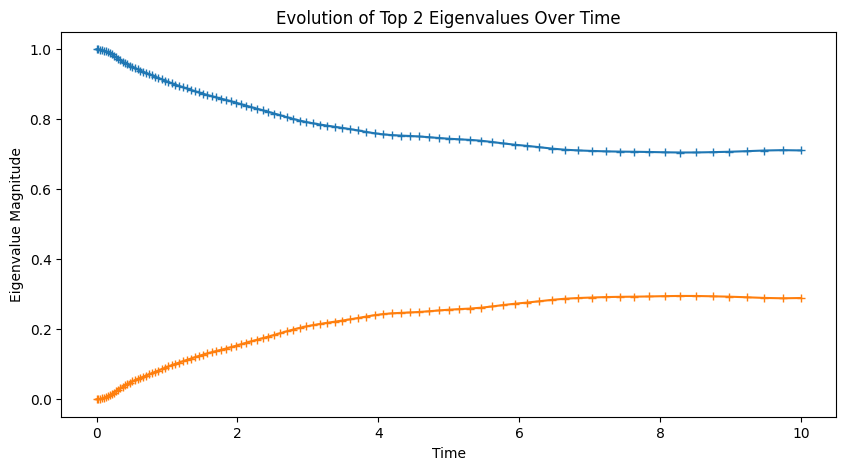

In [7]:
#testing new function

#need a plpot of schmidt value over time

s_val_0=[]
s_val_1=[]
t_ind = range(len(tlist))
for idx in t_ind:
    ss, se, sv = compute_schmidt_states_new(result, idx)
    s_val_0.append(sv[0])
    s_val_1.append(sv[1])

plt.figure(figsize=(10, 5))
plt.plot(tlist,s_val_0, marker='+')
plt.plot(tlist,s_val_1, marker='+')
plt.title('Evolution of Top 2 Eigenvalues Over Time')
plt.xlabel('Time')
plt.ylabel('Eigenvalue Magnitude')


In [146]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.03
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
#using all above to obtain QM qtts
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,1)

ss,se,sv=compute_schmidt_states_new(result,50)


In [8]:
ss[0].shape
se[0].shape

AttributeError: 'list' object has no attribute 'shape'

In [29]:
large_array = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(large_array.shape())
start_index=0
end_index=3
# Take a sub-array (slice) of the large array
sub_array = large_array[start_index:end_index]

# Print the sub-array
print(sub_array)

AttributeError: 'list' object has no attribute 'shape'

1.0